# ============================================
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO - DETALLE VENTAS
# ============================================

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')


### **Cargar el dataset**

In [8]:

detalle_ventas = pd.read_csv('../Base_de_datos_limpia/Detalle_ventas_limpio.csv')

### **Inspección general**

In [9]:
print("Primeras filas del dataset:")
display(detalle_ventas.head())

print("\nInformación general:")
print(detalle_ventas.info())

Primeras filas del dataset:


,id_venta,id_producto,cantidad,precio_unitario,importe
0,1,90,1,2902,2902
1,2,82,5,2394,11970
2,2,39,5,469,2345
3,2,70,2,4061,8122
4,2,22,1,2069,2069



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id_venta         343 non-null    int64
 1   id_producto      343 non-null    int64
 2   cantidad         343 non-null    int64
 3   precio_unitario  343 non-null    int64
 4   importe          343 non-null    int64
dtypes: int64(5)
memory usage: 13.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id_venta         343 non-null    int64
 1   id_producto      343 non-null    int64
 2   cantidad         343 non-null    int64
 3   precio_unitario  343 non-null    int64
 4   importe          343 non-null    int64
dtypes: int64(5)
memory usage: 13.5 KB
None


### **Estadísticas descriptivas generales**

In [14]:
# Asegurar que cantidad, precio_unitario e importe sean numéricos
cols_numericas = ['cantidad', 'precio_unitario', 'importe']
for col in cols_numericas:
    detalle_ventas[col] = pd.to_numeric(detalle_ventas[col], errors='coerce')

print("\n📊 Estadísticas descriptivas:")
display(detalle_ventas[cols_numericas].describe())


📊 Estadísticas descriptivas:


,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000
mean,2.962099,2654.495627,7730.078717
std,1.366375,1308.694720,5265.543077
min,1.000000,272.000000,272.000000
25%,2.000000,1618.500000,3489.000000
50%,3.000000,2512.000000,6702.000000
75%,4.000000,3876.000000,10231.500000
max,5.000000,4982.000000,24865.000000


### **Productos más vendidos y más valiosos**


Top 5 productos más vendidos por cantidad:
id_producto
43    27
18    26
79    24
68    22
81    22
Name: cantidad, dtype: int64


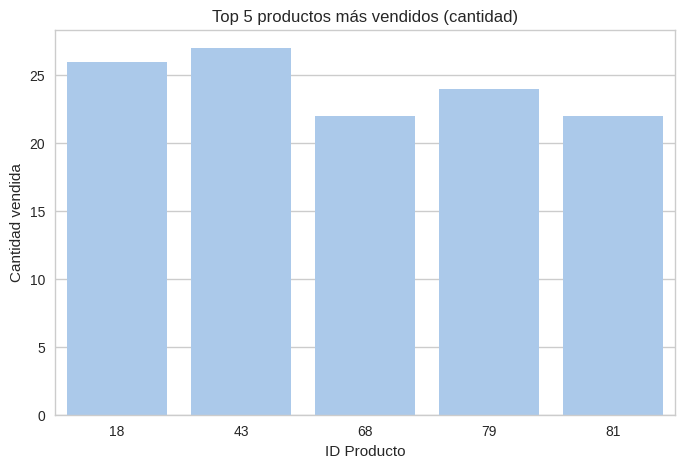


Top 5 productos más valiosos (importe total):
id_producto
91    93800
18    89544
76    85720
72    81396
9     77560
Name: importe, dtype: int64


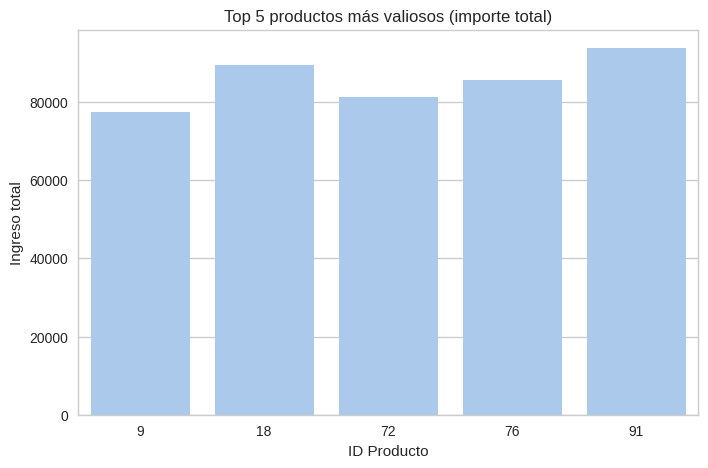

In [16]:
# Top 5 productos por cantidad
producto_mas_vendido = detalle_ventas.groupby('id_producto')['cantidad'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 productos más vendidos por cantidad:")
print(producto_mas_vendido)

plt.figure(figsize=(8,5))
sns.barplot(x=producto_mas_vendido.index, y=producto_mas_vendido.values)
plt.title('Top 5 productos más vendidos (cantidad)')
plt.xlabel('ID Producto')
plt.ylabel('Cantidad vendida')
plt.show()

# Top 5 productos por ingreso (importe total)
producto_mas_valioso = detalle_ventas.groupby('id_producto')['importe'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 productos más valiosos (importe total):")
print(producto_mas_valioso)

plt.figure(figsize=(8,5))
sns.barplot(x=producto_mas_valioso.index, y=producto_mas_valioso.values)
plt.title('Top 5 productos más valiosos (importe total)')
plt.xlabel('ID Producto')
plt.ylabel('Ingreso total')
plt.show()

### **Distribución de cantidad, precio_unitario e importe**

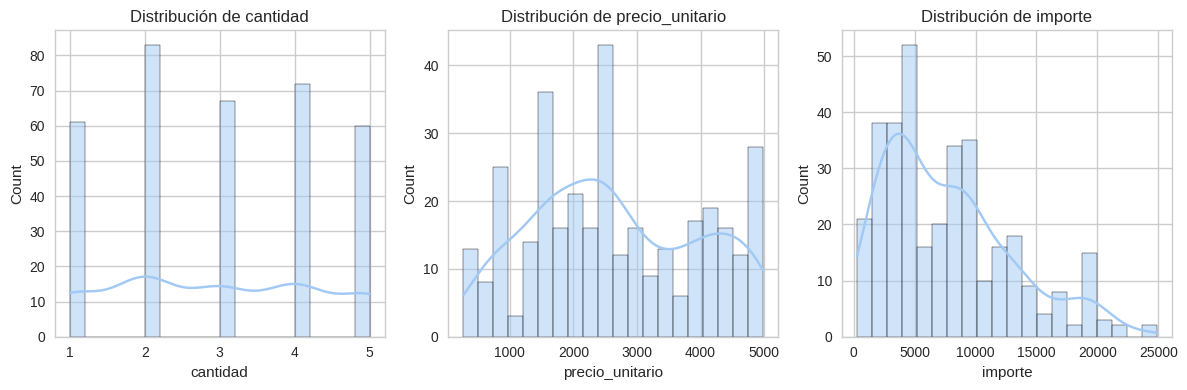

In [17]:
plt.figure(figsize=(12,4))
for i, col in enumerate(cols_numericas):
    plt.subplot(1,3,i+1)
    sns.histplot(detalle_ventas[col], bins=20, kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

### **Scatter plots**

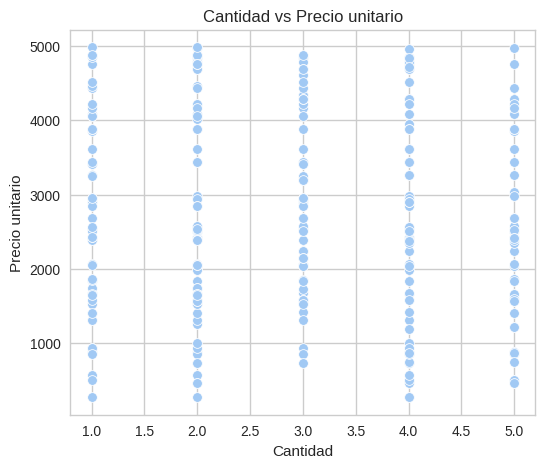

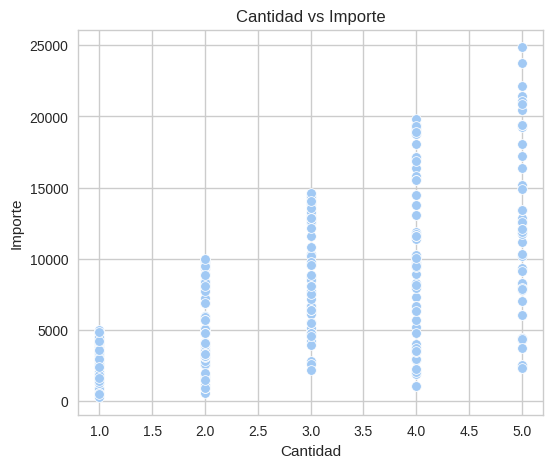

In [18]:
# Cantidad vs Precio unitario
plt.figure(figsize=(6,5))
sns.scatterplot(x='cantidad', y='precio_unitario', data=detalle_ventas)
plt.title('Cantidad vs Precio unitario')
plt.xlabel('Cantidad')
plt.ylabel('Precio unitario')
plt.show()

# Cantidad vs Importe
plt.figure(figsize=(6,5))
sns.scatterplot(x='cantidad', y='importe', data=detalle_ventas)
plt.title('Cantidad vs Importe')
plt.xlabel('Cantidad')
plt.ylabel('Importe')
plt.show()

### **Análisis por id_venta**


Top 5 ventas con mayor importe total:
id_venta
50     61503
57     57287
32     53828
38     50855
100    50461
Name: importe, dtype: int64


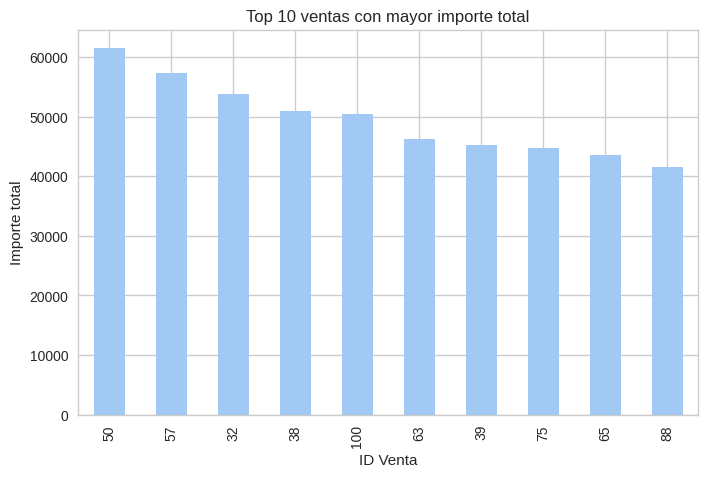


Top 5 ventas con más productos distintos:
id_venta
50     5
100    5
114    5
18     5
45     5
Name: id_producto, dtype: int64


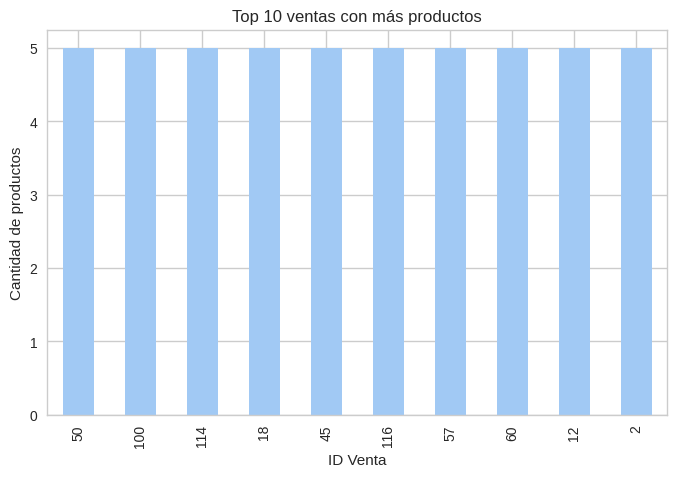

In [19]:
# Total de importe por venta
importe_por_venta = detalle_ventas.groupby('id_venta')['importe'].sum()
print("\nTop 5 ventas con mayor importe total:")
print(importe_por_venta.sort_values(ascending=False).head(5))

plt.figure(figsize=(8,5))
importe_por_venta.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 ventas con mayor importe total')
plt.xlabel('ID Venta')
plt.ylabel('Importe total')
plt.show()

# Cantidad de productos por venta
productos_por_venta = detalle_ventas.groupby('id_venta')['id_producto'].count()
print("\nTop 5 ventas con más productos distintos:")
print(productos_por_venta.sort_values(ascending=False).head(5))

plt.figure(figsize=(8,5))
productos_por_venta.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 ventas con más productos')
plt.xlabel('ID Venta')
plt.ylabel('Cantidad de productos')
plt.show()